In [1]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

from ipywidgets import interact, widgets

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Load the Washington housing dataset
df1 = pd.read_csv('house_price_prediction.csv')
print("The Washington housing dataset has {} data points with {} variables each.".format(*df1.shape))
df1.head(2)

The Washington housing dataset has 4600 data points with 18 variables each.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


## EDA and Summary Statistics

In [3]:
# inspecting structure of dataframe & number of null values (if any)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [4]:
df1.describe()

#notice: price, bedrooms, & bathrooms have min of 0. Needs furthern investigation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Notice `price`, `bedrooms`, & `bathroom` have a minimum value of 0. Needs further investigation.

## Some statistics

In [5]:
# Minimum price of the data
minimum_price = round(np.amin(df1["price"]), 2)

# Maximum price of the data
maximum_price = round(np.amax(df1["price"]), 2)

# Mean price of the data
mean_price = round(np.mean(df1["price"]), 2)

# Median price of the data
median_price = round(np.median(df1["price"]), 2)

# Standard deviation of prices of the data
std_price = round(np.std(df1["price"]), 2)

# Show the calculated statistics
print("Statistics for Washington housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Washington housing dataset:

Minimum price: $0.0
Maximum price: $26590000.0
Mean price: $551962.99
Median price $460943.46
Standard deviation of prices: $563773.41


## Feature Observation

Confirm sqft_living is sqft_above + sqft_basement?

In [6]:
# Notice sqft_above & sqft_basement add up to sqft_living.
(df1.sqft_living == df1.sqft_above + df1.sqft_basement).all()

True

## Feature Engineering

In [9]:
df2 = df1.copy()


df2['date'] = pd.to_datetime(df2['date']) # change date col to datetime
df2["month"] = df2['date'].dt.month # creating month feature
df2["year"] = df2['date'].dt.year  # all 2014 so can drop
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category') # change data types to categorical
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0]) # split statezip into state & zipcode
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot # creating total_sqft feature: sqft_above + sqft_lot
df2["street_name"] = df2['street'].str.strip().str.lstrip('-0123456789').str.strip().str.lower()

## Missing/zero values & outliers

### Zero/Missing Values

In [10]:
df3 = df2.copy()

# counting the number of zero values in each column
df3.isin([0]).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
country             0
month               0
year                0
state               0
zipcode             0
total_sqft          0
street_name         0
dtype: int64

Notice: `waterfront` & `view` have categorical values of 0 & 1.  
Nearly half of `yr_renovated` are 0.  
Inspect the 0s in `bedrooms` & `bathrooms`

In [11]:
# 0 Price

price_zero_len = round((len(df3[df3.price == 0])/len(df3)) * 100, 1)
print('There are {} houses worth $0, which are {}% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.'.format(len(df3[df3.price == 0]), price_zero_len))
print('')

df3['price_is0'] = (df3['price'] == 0).astype(int)

There are 49 houses worth $0, which are 1.1% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.



In [12]:
# 0 yr_renovated

# percentage of 'yr_renovated' col with 0 entries
yr_renov_0 = round((len(df3[df3['yr_renovated'] == 0]) / len(df3)) * 100, 1)
print("{}% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.".format(yr_renov_0))

df3['renov_date_is0'] = (df3['yr_renovated'] == 0).astype(int)

59.5% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.


In [13]:
# 0 bedrooms & bathrooms

df3[df3.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city,country,month,year,state,zipcode,total_sqft,street_name,price_is0,renov_date_is0
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,...,Seattle,USA,6,2014,WA,98102,7828,e howe st,0,0
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,...,Redmond,USA,6,2014,WA,98053,32818,ne 64th pl,0,0


There are 2 houses with 0s as their bedrooms & bathrooms shown above.  
We can see that the houses are both worth over 1 mil, therefore the 0s must be errors.  
Will replace 0s with the mean bedroom & bathroom values of 3 & 2 respectively.

In [14]:
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

In [15]:
# removing price outliers
df_no_outs = df3[df3.price < 10000000].copy()

# removing zero price
df_no_zeros = df_no_outs[df_no_outs["price"] != 0]

### Outliers

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

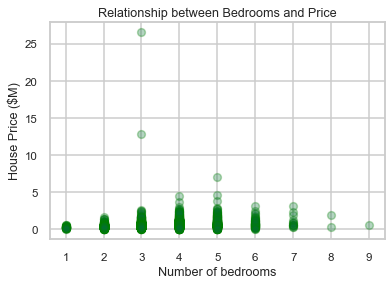

In [16]:
# Price

plt.scatter(df3["bedrooms"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')
#ax.set_facecolor('grey')

Notice 2 outliers priced around \\$13 M & \\$26 M, both with 3 bedrooms.

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

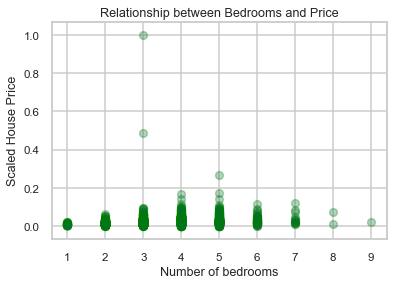

In [17]:
# normalized / scaled scatter plot of bedrooms vs price
X = df3["price"].values.reshape(-1,1)
X = MinMaxScaler().fit_transform(X)
plt.scatter(df3["bedrooms"], X, s=60, alpha=0.3, edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("Scaled House Price")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')

We can see in the above plot that even after scaling the data, the outliers remain outliers.

Text(0.5, 1.0, 'Relationship between Bedrooms and Price (Without Outliers)')

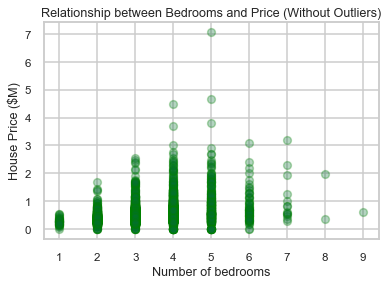

In [18]:
# plot with removed price outliers
plt.scatter(df_no_outs["bedrooms"], np.divide(df_no_outs["price"], 1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price (Without Outliers)")

A polynomial (quadratic) regression might fit the data better.  
(squared 'bedrooms' when modelling)

In [19]:
df3[df3.price > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city,country,month,year,state,zipcode,total_sqft,street_name,price_is0,renov_date_is0
4346,2014-06-23,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,...,Seattle,USA,6,2014,WA,98199,13584,40th ave w,0,0
4350,2014-07-03,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,Kent,USA,7,2014,WA,98031,8973,se 219th ct,0,1


House price of greater than $10 milion might be too high for a 3 bedroom house. Do they have higher square footage than the other houses?

Text(0.5, 1.0, 'House Size vs Price')

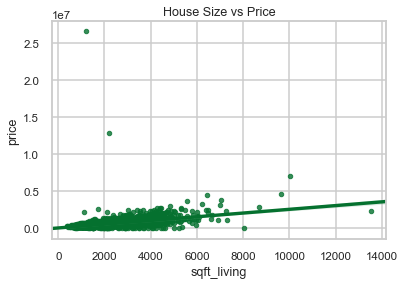

In [20]:
sns.regplot(data=df3, x='sqft_living', y='price', fit_reg=True, scatter_kws={'s':20})
plt.title("House Size vs Price")

We see in the above plot that the size of the houses priced over $10 mil does not explain why they're priced very high. Might be an error. Therefore consider modeling the data with the 2 price outliers removed.